# Importancia dos bibliotecas

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importacao dos dados

In [3]:
dados_tratados = pickle.load(open('dados/dados_tratados.pickle', 'rb'))

In [4]:
x_treino = dados_tratados['x_treino']
y_treino = dados_tratados['y_treino']
x_teste = dados_tratados['x_teste']
y_teste = dados_tratados['y_teste']

print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape) # x_treino.shape

(59606, 20) (59606,) (15891, 20) (15891,)


# Treinamento do modelo

In [7]:
model = RandomForestClassifier()
model = model.fit(x_treino, y_treino)

In [63]:
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(model, x_treino, y_treino, cv=3,
                                    method="predict_proba")

In [66]:
y_scores = cross_val_predict(model, x_treino, y_treino, cv=3)

In [68]:
y_scores.shape

(59606,)

In [73]:
# score = proba of positive class
fpr, tpr, thresholds = roc_curve(y_treino,y_scores)

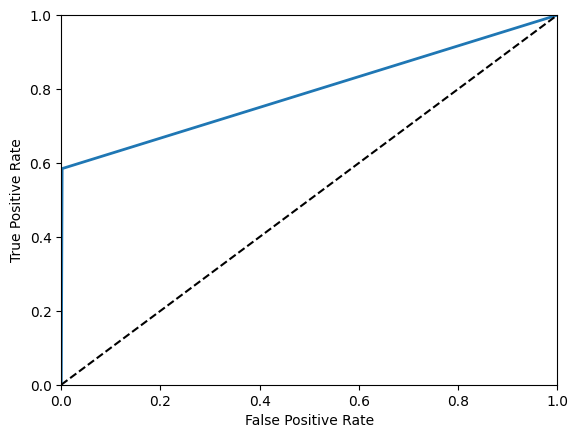

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
y_pred = model.predict(x_teste)

In [81]:

y_predict_proba = model.predict_proba(x_treino)

In [101]:
y_proba = model.predict_proba(x_treino)
y_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [132]:
y_pred_prob_threshold = (y_proba[:, 1] >= 0.7).astype(int)
confusion_matrix(y_treino, y_pred_prob_threshold)

array([[58609,     0],
       [  126,   871]])

In [137]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_teste)
y_proba = model.predict_proba(x_teste)
y_pred_prob_threshold = (y_proba[:, 1] >= 0.3).astype(int)
confusio = confusion_matrix(y_teste, y_pred_prob_threshold)
confusio

array([[15428,    90],
       [   73,   300]])

In [143]:
lista_valor_monetario = []
for i in range(0, 10):
    y_proba = model.predict_proba(x_teste)
    y_pred_prob_threshold = (y_proba[:, 1] >= i/10).astype(int)
    confusio = confusion_matrix(y_teste, y_pred_prob_threshold)
    lista_valor_monetario.append((confusio[0][0] *0)+(confusio[1][1] * 25)+(confusio[0][1]*10)+(confusio[1][0]*500))

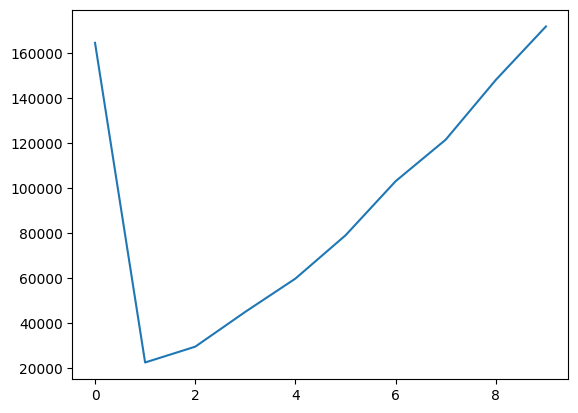

In [148]:
plt.plot(range(0, 10), lista_valor_monetario)

In [96]:
confusio

array([[15496,    22],
       [  152,   221]])

In [97]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.91      0.59      0.72       373

    accuracy                           0.99     15891
   macro avg       0.95      0.80      0.86     15891
weighted avg       0.99      0.99      0.99     15891

